<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>

</center>

# Projet Recherche et Innovation, par Eva Marques, Aleksi Timonen, et Solange Pruilh
# Tuteur : M. Philippe Besse

# Première Partie : 
# B- Reconnaissance de caractères (MNIST )  en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> avec <a href="http://keras.io"><img src="keras.png" style="max-width: 70px; display: inline" alt="Keras"/></a>

In [3]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

import keras
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop,Adam
from keras.utils import np_utils
from keras import backend as K

Using TensorFlow backend.


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Déclarations des variables utiles au formatage des données et des couches.

In [5]:
batch_size = 128
nb_classes = 10
nb_epoch = 18

# input image dimensions
img_rows, img_cols = 28, 28
# nombre de filtres de convolutions à utiliser => 1ere dimension de l'objet en sortie de la couche
nb_filters = 32
# taille de la zone de pooling pour max pooling
pool_size = (2, 2)
# taille du noyau de convolution
kernel_size = (3, 3)

# 1 Transformation des données

La transformation des données a été effectuée de nombreuses fois dans des solutions proposées sur internet, nous en avons repris le code.
Nous  en expliquons quand même la raison.

In [6]:
# Lecture des données d'apprentissage
path="" # Si les données osnt dans le répertoire courant sinon:
#path="http://www.math.univ-toulouse.fr/~besse/Wikistat/data/"
X_train=pd.read_csv(path+"mnist_train.csv",header=None)
Y_train=X_train.iloc[:,784]
X_train.drop(X_train.columns[[784]], axis=1,inplace=True)

X_test=pd.read_csv(path+"mnist_test.csv",header=None)
Y_test=X_test.iloc[:,784]
X_test.drop(X_test.columns[[784]], axis=1,inplace=True)

print (X_train.shape)
print (X_test.shape)
X_train.head()

(60000, 784)
(10000, 784)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ci-dessous les données sont formatées afin de pouvoir correspondre au format attendu du premiers réseau, puis plus loin des des couches de convolution.

In [7]:
# Les données sont séparées entre échantillon d'apprentissage et test
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
X_train=pd.DataFrame.as_matrix(X_train)
X_test=pd.DataFrame.as_matrix(X_test)
if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
    input_shape = (img_rows, img_cols,1)


(60000, 784)


In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#normalisation des données
X_train-=X_train.mean()
X_test-=X_test.mean()
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convertir des classes de vecteurs en matrices binaires
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print (Y_test)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
[[ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


# 2 Réseau simple

In [ ]:
model = Sequential()

model.add(Activation('relu',input_shape=input_shape))

model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [8]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
activation_1 (Activation)    (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total para

In [10]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.5/dist-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s - loss: 0.3936 - acc: 0.8903 - val_loss: 0.2010 - val_acc: 0.9426
Epoch 2/10
60000/60000 [==============================] - 2s - loss: 0.1926 - acc: 0.9452 - val_loss: 0.1431 - val_acc: 0.9580
Epoch 3/10
60000/60000 [==============================] - 2s - loss: 0.1452 - acc: 0.9575 - val_loss: 0.1149 - val_acc: 0.9663
Epoch 4/10
60000/60000 [==============================] - 2s - loss: 0.1183 - acc: 0.9655 - val_loss: 0.1008 - val_acc: 0.9705
Epoch 5/10
60000/60000 [==============================] - 2s - loss: 0.1015 - acc: 0.9697 - val_loss: 0.0921 - val_acc: 0.9724
Epoch 6/10
60000/60000 [==============================] - 2s - loss: 0.0914 - acc: 0.9729 - val_loss: 0.0814 - val_acc: 0.9757
Epoch 7/10
60000/60000 [==============================] - 2s - loss: 0.0818 - acc: 0.9759 - val_loss: 0.0808 - val_acc: 0.9753
Epoch 8/10
60000/60000 [==============================] - 2s 

# 3 Réseau de neurones avec Convolution

In [9]:
model = Sequential()
model.add(Conv2D(nb_filters,(kernel_size[0], kernel_size[1]),
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))



/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., padding="valid")`
  after removing the cwd from sys.path.


In [10]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2769024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
__________

In [44]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=10,verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 53s - loss: 0.2600 - acc: 0.9209 - val_loss: 0.0787 - val_acc: 0.9766
Epoch 2/10
60000/60000 [==============================] - 51s - loss: 0.0816 - acc: 0.9752 - val_loss: 0.0551 - val_acc: 0.9827
Epoch 3/10
60000/60000 [==============================] - 51s - loss: 0.0538 - acc: 0.9838 - val_loss: 0.0502 - val_acc: 0.9841
Epoch 4/10
60000/60000 [==============================] - 50s - loss: 0.0390 - acc: 0.9882 - val_loss: 0.0465 - val_acc: 0.9848
Epoch 5/10
60000/60000 [==============================] - 49s - loss: 0.0323 - acc: 0.9902 - val_loss: 0.0510 - val_acc: 0.9836
Epoch 6/10
60000/60000 [==============================] - 51s - loss: 0.0242 - acc: 0.9925 - val_loss: 0.0460 - val_acc: 0.9861
Epoch 7/10
60000/60000 [==============================] - 50s - loss: 0.0227 - acc: 0.9933 - val_loss: 0.0521 - val_acc: 0.9853
Epoch 8/10
60000/60000 [==============================

(10000, 26, 26, 32)


/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


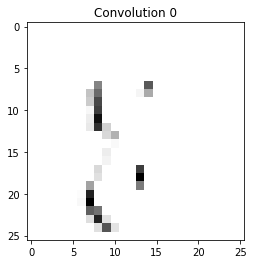

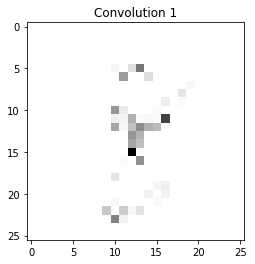

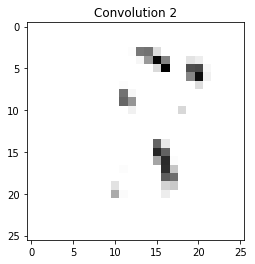

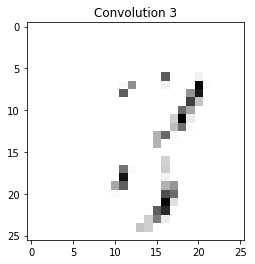

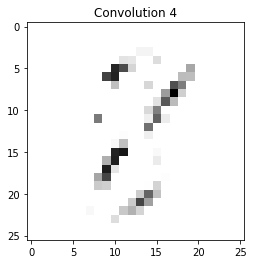

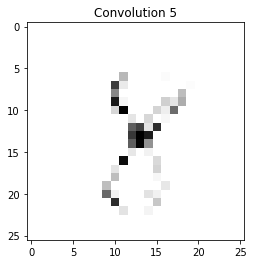

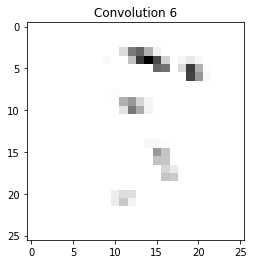

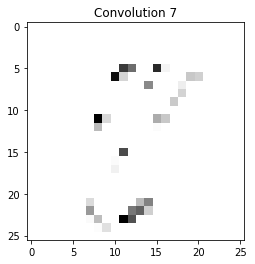

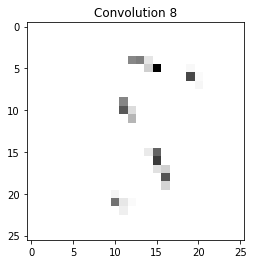

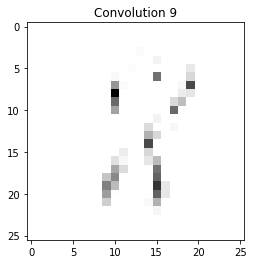

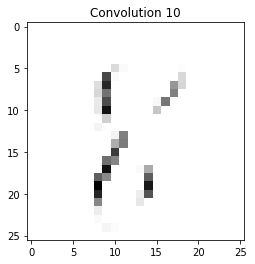

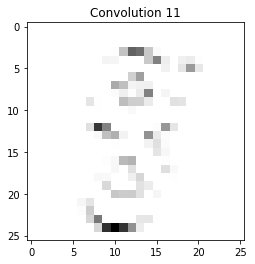

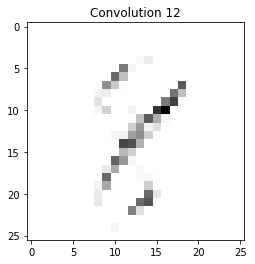

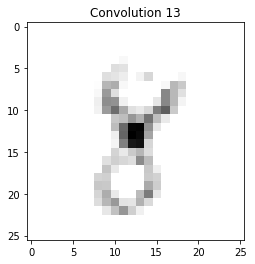

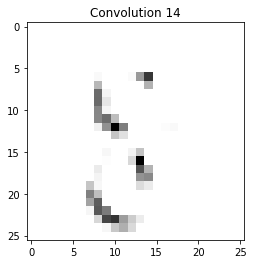

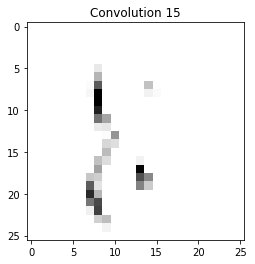

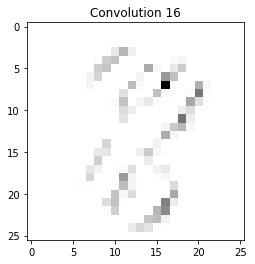

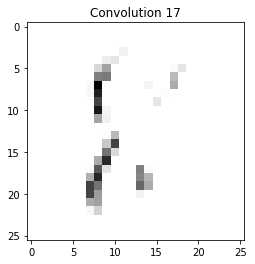

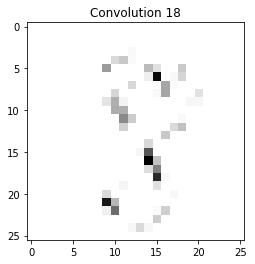

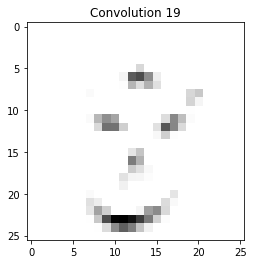

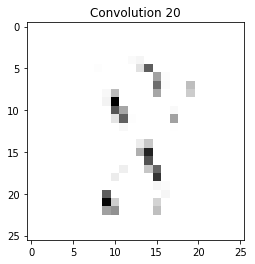

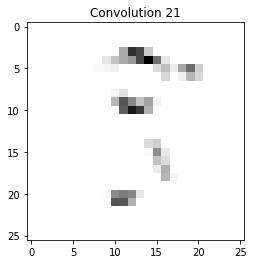

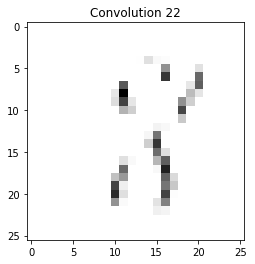

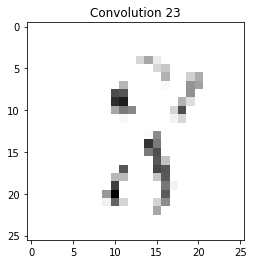

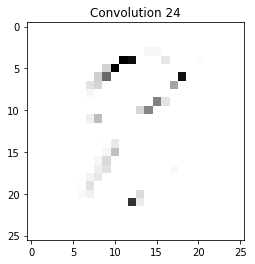

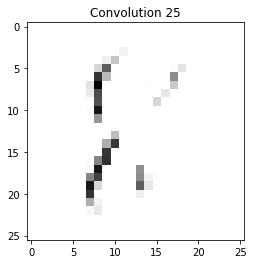

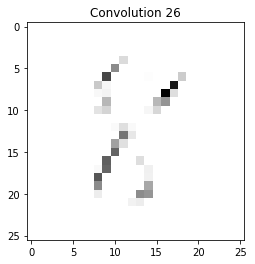

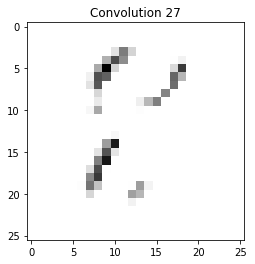

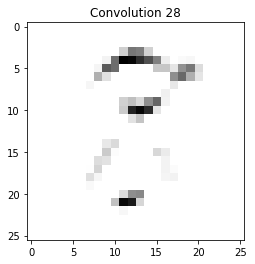

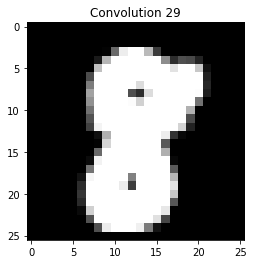

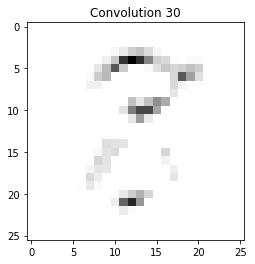

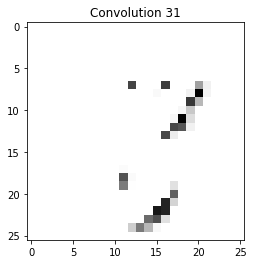

In [45]:
# code simple pour visualiser les sorties de la première couche de convolution 

get_1st_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])
layer_output = get_1st_layer_output([X_test,0])[0]


print (layer_output.shape)
from matplotlib.pyplot import imshow

for i in range(32) :
    plt.figure()
    plt.title("Convolution %d" % (i))
    plt.imshow(layer_output[0,:,:,i],cmap="Greys")
    plt.savefig('conv %d.png' % i)


# 4 Réseau de neurones (presque) optimal

This notebook compute the convolutional neural network on the MNIST data. The code is extracted from https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py 

In [15]:
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(64, (kernel_size[0], kernel_size[1]),activation='relu'))

model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))




/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(28, 28, 1...)`
  """


In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
__________

In [18]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.5/dist-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 180s - loss: 0.2206 - acc: 0.9315 - val_loss: 0.0462 - val_acc: 0.9841
Epoch 2/10
60000/60000 [==============================] - 173s - loss: 0.0763 - acc: 0.9771 - val_loss: 0.0353 - val_acc: 0.9883
Epoch 3/10
60000/60000 [==============================] - 190s - loss: 0.0600 - acc: 0.9820 - val_loss: 0.0330 - val_acc: 0.9895
Epoch 4/10
60000/60000 [==============================] - 181s - loss: 0.0503 - acc: 0.9854 - val_loss: 0.0304 - val_acc: 0.9898
Epoch 5/10
60000/60000 [==============================] - 176s - loss: 0.0466 - acc: 0.9865 - val_loss: 0.0313 - val_acc: 0.9894
Epoch 6/10
60000/60000 [==============================] - 175s - loss: 0.0433 - acc: 0.9873 - val_loss: 0.0299 - val_acc: 0.9905
Epoch 7/10
60000/60000 [==============================] - 176s - loss: 0.0401 - acc: 0.9882 - val_loss: 0.0305 - val_acc: 0.9910
Epoch 8/10
60000/60000 [=======================

In [27]:
pred=model.predict(X_test,batch_size=128,verbose=0)
print (pred[0,:])

[  4.32610024e-11   1.23851736e-11   1.30537969e-09   1.52760096e-11
   1.20263972e-11   4.46174001e-11   7.52703282e-12   4.80042167e-13
   1.00000000e+00   1.44166346e-10]


D'après le vecteur de sortie (de taille 10) pour le premier chiffre de l'échantillon test, le label correspondant est 8.

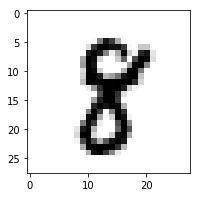

In [23]:
#On vérifie que le premier digit est bien un 8
plt.figure(1, figsize=(3, 3))
plt.imshow(np.matrix(X_test[0,:]).reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()